<a href="https://colab.research.google.com/github/manthan-mehta/ImageClassification/blob/master/KNearestNeighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import random

In [0]:
import matplotlib.pyplot as plt


In [0]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
  import pickle
  with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id),'rb') as fo:
    dict=pickle.load(fo,encoding='latin1')
  return dict

In [0]:
dict=load_cfar10_batch('/content',1)

In [0]:
features = dict['data'].reshape((len(dict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels = dict['labels']

In [15]:
type(labels)

list

In [16]:
labels=np.asarray(labels)
labels.shape

(10000,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2)

In [19]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', Y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)

Training data shape:  (8000, 32, 32, 3)
Training labels shape:  (8000,)
Test data shape:  (2000, 32, 32, 3)
Test labels shape:  (2000,)


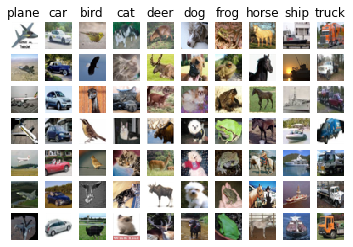

In [20]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [21]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [0]:
from builtins import object
class KnearestNeighbour(object):
      def init(self):
        pass
      def train(self,x,y):
        self.X_train = x
        self.Y_train = y
      
      def predict(self,x,k=1):
        num_test = x.shape[0]
        num_train = self.X_train.shape[0]
        dist = np.zeros((num_test,num_train))
        for i in range(num_test):
          for j in range(num_train):
              dist[i][j] = np.sqrt(np.sum((self.X_train[j]-x[i])**2))
        return self.predict_labels(dist,k=1)  
      
      def predict_labels(self,dist,k=1):
        num_test = dist.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
          closest_y = []
          closest_y = self.Y_train[np.argsort(dist[i])][0:k]
          y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred


In [0]:
classifier = KnearestNeighbour()
classifier.train(X_train,Y_train)

In [0]:
y_test_period = classifier.predict(X_test,200)

In [25]:
num_correct = np.sum(y_test_period == Y_test)
print(num_correct)

96


In [26]:
accuracy = float(num_correct/500)
print(accuracy)

0.192


In [28]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
Y_train_folds = []
X_train_folds = np.array_split(X_train,num_folds)
Y_train_folds = np.array_split(Y_train,num_folds)

k_accuracies = {}

for k in k_choices:
  k_accuracies[k]=[]
  for i in range(num_folds):
    X_train_fold = np.concatenate([fold for j,fold in enumerate(X_train_folds) if i!=j])
    Y_train_fold = np.concatenate([fold for j,fold in enumerate(Y_train_folds) if i!=j])
    
    classifier.train(X_train_fold,Y_train_fold)
    y_fold_pred = classifier.predict(X_train_folds[i],k)

    num_correct = np.sum(y_fold_pred == Y_train_folds[i])
    accuracy = float(num_correct/X_train_folds[i].shape[0])

    k_accuracies[k].append(accuracy)


for k in k_choices:
  for accuracy in k_accuracies[k]:
    print('k = %d , accuracy = %f '% (k,accuracy))



k = 1 , accuracy = 0.196000 
k = 1 , accuracy = 0.213000 
k = 1 , accuracy = 0.193000 
k = 1 , accuracy = 0.194000 
k = 1 , accuracy = 0.199000 
k = 3 , accuracy = 0.196000 
k = 3 , accuracy = 0.213000 
k = 3 , accuracy = 0.193000 
k = 3 , accuracy = 0.194000 
k = 3 , accuracy = 0.199000 
k = 5 , accuracy = 0.196000 
k = 5 , accuracy = 0.213000 
k = 5 , accuracy = 0.193000 
k = 5 , accuracy = 0.194000 
k = 5 , accuracy = 0.199000 
k = 8 , accuracy = 0.196000 
k = 8 , accuracy = 0.213000 
k = 8 , accuracy = 0.193000 
k = 8 , accuracy = 0.194000 
k = 8 , accuracy = 0.199000 
k = 10 , accuracy = 0.196000 
k = 10 , accuracy = 0.213000 
k = 10 , accuracy = 0.193000 
k = 10 , accuracy = 0.194000 
k = 10 , accuracy = 0.199000 
k = 12 , accuracy = 0.196000 
k = 12 , accuracy = 0.213000 
k = 12 , accuracy = 0.193000 
k = 12 , accuracy = 0.194000 
k = 12 , accuracy = 0.199000 
k = 15 , accuracy = 0.196000 
k = 15 , accuracy = 0.213000 
k = 15 , accuracy = 0.193000 
k = 15 , accuracy = 0.194000 
